# Homework 01

## Problem 1: Hagen-Poiseuille Equation

The Hagen-Poiseuille equation is a physical law that gives the pressure drop in an incompressible and Newtonian fluid in laminar flow flowing through a long cylindrical pipe of constant cross sectional area. The pressure drop is given as:

### <center>$\Delta p=\frac{8\mu L Q}{\pi R^4}$</center>

where $\Delta p$ is the pressure drop, $L$ is the length of the pip, $\mu$ is the dynamic viscocity, $Q$ is the volumetric flowrate, $R$ is the pipe radius.

### Consider Glycerine at 26.5 $^{\circ}$C ($\mu$ = 0.492 Pa*s) flowing through a horizontal tube 1 ft long at a flow rate of 0.00398 $ft^3/min$. Calculate and plot the pressure drop (in psi) across the tube as the inner diameter is varied between 0.1 inch and 1.0 inch at a constant flow rate. Label all axes of the plots with the quantities plotted and their units.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ft_to_in = 12. # in/ft
min_to_s = 60. # s/min
pa_to_psi = 0.000145038 # psi/Pa
L  = 1.0 * ft_to_in # in
Q = 0.00398 * (ft_to_in)**3 / min_to_s # in**3/s
mu = 0.492 * pa_to_psi # psi*s
R = np.linspace(0.1, 1) / 2. # in

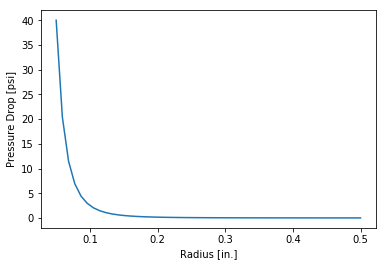

In [2]:
def dp(R):
    return (8*mu*L*Q)/(np.pi * R**4)

plt.plot(R, dp(R))
plt.xlabel("Radius [in.]")
plt.ylabel("Pressure Drop [psi]")
plt.show()
plt.close()

# Problem 2: Antoine Equation for Vapor Pressures of Pure Species

The saturation vapor pressure of a pure species in a fixed temperature can be determined via the Antoine Equation given a suitable set of parameters. The Antoine Equation is given by:

### <center>$ln P^{sat}(t) = A - \frac{B}{t + C}$</center>

where $P^{sat}$ is the vapor pressure (given in kPa), t is the temperature (given in $^{\circ}C$) and A, B, and C are adjustable parameters fit to experimental data.

### Given the following set of parameters `params_dict`, plot the vapor pressure given by the Antoine equation as a function of temperature in the given temperature range `tmin` to `tmax` for each chemical species. Be sure to label all axes and title each plot with the chemical species name.

In [3]:
params_dict = {
    "Acetonitrile": {
        "A": 14.8950,
        "B": 3413.10,
        "C": 250.523,
        "tmin": -27.0,
        "tmax": 81.0,
    },
    "Chlorobenzene": {
        "A": 13.8635,
        "B": 3174.78,
        "C": 211.700,
        "tmin": 29.0,
        "tmax": 159.0,
    },
    "Ethylene glycol": {
        "A": 15.7567,
        "B": 4187.46,
        "C": 178.650,
        "tmin": 100.,
        "tmax": 222.,
    },
    "iso-Octane": {
        "A": 13.6703,
        "B": 2896.31,
        "C": 220.767,
        "tmin": 2.0,
        "tmax": 125.0,
    },
    "Water": {
        "A": 16.3872,
        "B": 3885.70,
        "C": 230.170,
        "tmin": 0.,
        "tmax": 200.,
    },
}

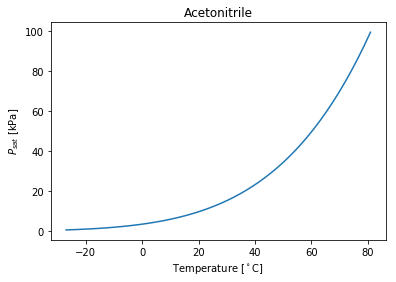

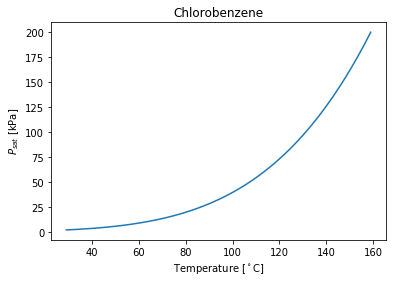

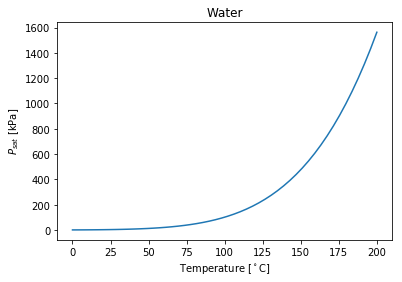

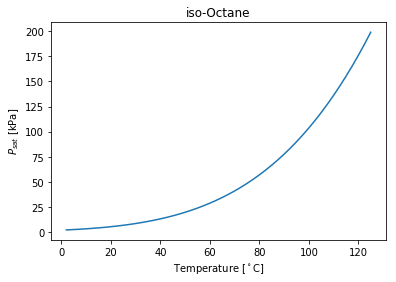

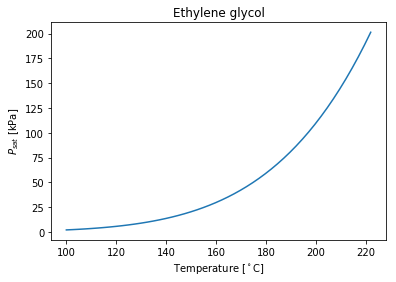

In [4]:
def antoine(t, A, B, C):
    return np.exp(A-(B/(t+C)))

for name, p in params_dict.items():
    t = np.linspace(p['tmin'], p['tmax'])
    p_sat = antoine(t, p['A'], p['B'], p['C'])
    plt.plot(t, p_sat)
    plt.title(name)
    plt.xlabel("Temperature [$^\circ$C]")
    plt.ylabel("$P_{sat}$ [kPa]")
    plt.show()
    plt.close()

# Problem 3: Determination of Antoine Equation Coefficients from Data

You are given the following data for the pure species vapor pressure of Fluorene:

<img src="https://webbook.nist.gov/cgi/cbook.cgi?Struct=C86737&Type=Color">

In [5]:
# t in degree Celcius
t = np.array([172.01, 175.78, 176.69, 182.47, 196.16, 
              199.05, 224.93, 230.68, 234.77, 236.01, 
              241.70, 250.77, 250.86, 268.12, 271.41, 
              271.55, 273.38, 277.37, 288.97, 293.05])

# Psat in kPa
Psat = np.array([24.15, 24.51, 25.51, 27.99, 32.91, 
                 34.86, 45.02, 49.67, 54.26, 52.12, 
                 57.25, 65.13, 64.00, 75.15, 76.98, 
                 75.96, 79.43, 82.63, 93.40, 95.62])

### Determine the Antoine Equation coefficients `A`, `B`, and `C` for Fluorene from the provided data

In [6]:
from scipy.optimize import curve_fit

# antoine function defined in question 2
# p0 taken from iso-Octane
pars, pcov = curve_fit(antoine, t, Psat, p0=[13.6703, 2896.31, 220.767])
print(pars)

[  10.62832692 3931.93697221  355.2710415 ]


### Plot the experimental data (scatter) and Antoine equation (line) together

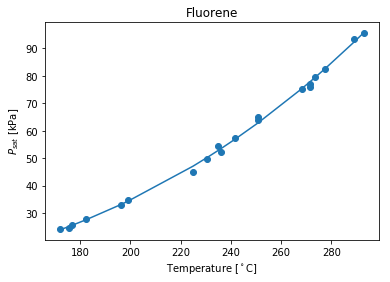

In [7]:
plt.scatter(t, Psat, label='data')
plt.plot(t, antoine(t, *pars), label='fit')
plt.title("Fluorene")
plt.xlabel("Temperature [$^\circ$C]")
plt.ylabel("$P_{sat}$ [kPa]")
plt.show()
plt.close()